# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Hans Kristiandi
- **Email:** hanskristiandi@gmail.com
- **ID Dicoding:** MC006D5Y2205

## Menentukan Pertanyaan Bisnis

- Dengan mempertimbangkan kategori seperti musim, bulan, hari, dan jam, kapankah sepeda paling banyak disewa?
- Apa pengaruh kondisi cuaca terhadap tingkat penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [128]:
day_df = pd.read_csv("day.csv", delimiter=",")  # Menampung data dari day.csv menjadi DataFrame
day_df.head()  # Menampilkan lima baris pertama pada DataFrame day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [129]:
hour_df = pd.read_csv("hour.csv", delimiter=",")  # Menampung data dari hour.csv menjadi DataFrame
hour_df.head()  # Menampilkan lima baris pertama pada DataFrame hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat DataFrame untuk tabel day menggunakan package Pandas
- Memuat DataFrame untuk tabel hour menggunakan package Pandas

### Assessing Data

In [130]:
day_df.info()  # Memeriksa tipe data data dari kolom-kolom pada day_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [131]:
hour_df.info()  # Memeriksa tipe data data dari kolom-kolom pada hour_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [132]:
# Mengecek apakah ada data yang terduplikat pada day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [133]:
# Mengecek apakah ada data yang terduplikat pada hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [134]:
# Mengecek detail terkait parameter data misal nilai mean, min, maks, median, dll dari day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [135]:
# Mengecek detail terkait parameter data misal nilai mean, min, maks, median, dll dari hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Mengecek tipe data dan informasi terkait parameter statistik dari day_df dan hour_df
- Pada day_df dan hour_df, diperoleh bahwa tipe data untuk *dteday* adalah *object* padahal seharusnya *datetime* dan hubungan antara bulan dan musim tidak sesuai (contoh pada bulan Januari namun sudah musim semi), serta penulisan *temp*, *atemp*, *hum*, *windspeed* hanya dibatasi dari interval [0, 1] sehingga akan diubah menjadi parameter yang lebih sesuai

### Cleaning Data

In [136]:
# Mengganti tipe data untuk kolom dteday pada day_df
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
day_df.info()  # Mengecek apakah tipe data sudah menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [137]:
# Menyesuaikan musim dengan bulan untuk day_df
day_df.loc[day_df['mnth'].isin([12, 1, 2]), 'season'] = 4  # Mengganti musim di bulan Des, Jan, Feb menjadi musim dingin
day_df.loc[day_df['mnth'].isin([3, 4, 5]), 'season'] = 1  # Mengganti musim di bulan Mar, Apr, Mei menjadi musim semi
day_df.loc[day_df['mnth'].isin([6, 7, 8]), 'season'] = 2  # Mengganti musim di bulan Jun, Jul, Agu menjadi musim panas
day_df.loc[day_df['mnth'].isin([9, 10, 11]), 'season'] = 3  # Mengganti musim di bulan Sep, Okt, Nov menjadi musim gugur
day_df.head(600)  # Mengecek random apakah musim sudah sesuai dengan bulan

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,4,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,4,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,4,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,4,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,4,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,2012-08-18,2,1,8,0,6,0,1,0.678333,0.618071,0.603333,0.177867,2827,5038,7865
596,597,2012-08-19,2,1,8,0,0,0,2,0.635833,0.603554,0.711667,0.086450,1208,3341,4549
597,598,2012-08-20,2,1,8,0,1,1,2,0.635833,0.595967,0.734167,0.129979,1026,5504,6530
598,599,2012-08-21,2,1,8,0,2,1,1,0.649167,0.601025,0.673750,0.072771,1081,5925,7006


In [138]:
# Mengembalikan parameter untuk suhu, kelembapan, dll ke bentuk semula dengan konstanta pengali yang ada pada file Readme
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["hum"] = day_df["hum"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,4,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,4,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,4,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,4,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [139]:
# Mengganti tipe data untuk kolom dteday pada hour_df
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(day_df[column])
hour_df.info()  # Mengecek apakah tipe data sudah menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [140]:
# Menyesuaikan musim dengan bulan untuk hour_df
hour_df.loc[hour_df['mnth'].isin([12, 1, 2]), 'season'] = 4  # Mengganti musim di bulan Des, Jan, Feb menjadi musim dingin
hour_df.loc[hour_df['mnth'].isin([3, 4, 5]), 'season'] = 1  # Mengganti musim di bulan Mar, Apr, Mei menjadi musim semi
hour_df.loc[hour_df['mnth'].isin([6, 7, 8]), 'season'] = 2  # Mengganti musim di bulan Jun, Jul, Agu menjadi musim panas
hour_df.loc[hour_df['mnth'].isin([9, 10, 11]), 'season'] = 3  # Mengganti musim di bulan Sep, Okt, Nov menjadi musim gugur
hour_df.head(15000)  # Mengecek random apakah musim sudah sesuai dengan bulan

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,4,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-02,4,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-03,4,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-04,4,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-05,4,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,NaT,3,1,9,0,0,6,0,1,0.60,0.5909,0.73,0.2836,32,140,172
14996,14997,NaT,3,1,9,1,0,6,0,1,0.58,0.5455,0.83,0.2985,18,106,124
14997,14998,NaT,3,1,9,2,0,6,0,1,0.56,0.5303,0.88,0.2537,10,73,83
14998,14999,NaT,3,1,9,3,0,6,0,1,0.56,0.5303,0.83,0.2836,6,39,45


In [141]:
# Mengembalikan parameter untuk suhu, kelembapan, dll ke bentuk semula dengan konstanta pengali yang ada pada file Readme
hour_df["temp"] = hour_df["temp"] * 41
hour_df["atemp"] = hour_df["atemp"] * 50
hour_df["hum"] = hour_df["hum"] * 100
hour_df["windspeed"] = hour_df["windspeed"] * 67
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,4,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-02,4,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-03,4,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-04,4,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-05,4,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- Dilakukan konversi tipe data yang semula berupa *object* menjadi *datetime* untuk kolom *dteday* pada day_df dan hour_df
- Dilakukan penyesuaian antara musim (season) dengan bulan (mnth)
- Dilakukan penyesuaian parameter untuk *temp*, *atemp*, *hum*, dan *windspeed* dengan cara mengalikannya dengan konstanta yang ada pada file pedoman Readme

## Exploratory Data Analysis (EDA)

### Explore ...

In [142]:
# Membandingkan tingkat penyewaan antara tahun 2011 dan 2012
day_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

,cnt
yr,
1,2049576
0,1243103


In [143]:
# Menampilkan pada musim apa sepeda paling laku disewa
hour_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

,cnt
season,
2,1042484
3,923174
1,829700
4,497321


In [144]:
# Menampilkan pada bulan berapa sepeda paling laku disewa
hour_df.groupby(by="mnth").cnt.sum().sort_values(ascending=False)

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


In [145]:
# Menampilkan pada hari apa sepeda paling laku disewa
hour_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)

,cnt
weekday,
5,487790
4,485395
6,477807
3,473048
2,469109
1,455503
0,444027


In [146]:
# Menampilkan pada jam berapa sepeda paling laku disewa
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


In [147]:
# Menampilkan jumlah,rata-rata, dan standar deviasi penyewa sepeda untuk bulan tertentu antara tahun 2011 sampai 2012
day_df.groupby(["yr", "mnth"]).cnt.sum()
day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": ["sum", "mean", "std"]
})

cnt                          
            sum         mean          std
yr mnth                                  
0  1      38189  1231.903226   372.432665
   2      48215  1721.964286   398.508839
   3      64045  2065.967742   550.971716
   4      94870  3162.333333  1042.093593
   5     135821  4381.322581   572.927883
   6     143512  4783.733333   444.447812
   7     141341  4559.387097   680.090762
   8     136691  4409.387097   809.852401
   9     127418  4247.266667   965.377251
   10    123511  3984.225806  1103.481844
   11    102167  3405.566667   788.249290
   12     87323  2816.870968   958.763187
1  1      96744  3120.774194   872.852134
   2     103137  3556.448276   870.724640
   3     164875  5318.548387  1251.162682
   4     174224  5807.466667  1308.938916
   5     195865  6318.225806  1078.403997
   6     202830  6761.000000   954.204995
   7     203607  6567.967742   867.183736
   8     214503  6919.451613   794.059017
   9     218573  7285.766667   979.160925
   10    198841  6414.225806  1941.819400
   11    152664  5088.800000  1129.731198
   12    123713  3990.741935  1803.227864

In [148]:
# Menyelidiki apakah hari libur, weekend, atau weekday yang memiliki penyewaan sepeda terbanyak
hour_df.groupby(["holiday", "workingday"]).cnt.sum()

holiday  workingday
0        0              921834
         1             2292410
1        0               78435
Name: cnt, dtype: int64

In [149]:
# Menggabungan hour_df dan day_df
bicycle_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant",
    suffixes=["_by_hour", "_by_day"]
)
bicycle_df.head()

,instant,dteday_by_hour,season_by_hour,yr_by_hour,mnth_by_hour,hr,holiday_by_hour,weekday_by_hour,workingday_by_hour,weathersit_by_hour,...,weekday_by_day,workingday_by_day,weathersit_by_day,temp_by_day,atemp_by_day,hum_by_day,windspeed_by_day,casual_by_day,registered_by_day,cnt_by_day
0,1,2011-01-01,4,0,1,0,0,6,0,1,...,6.0,0.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2,2011-01-02,4,0,1,1,0,6,0,1,...,0.0,0.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3,2011-01-03,4,0,1,2,0,6,0,1,...,1.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2011-01-04,4,0,1,3,0,6,0,1,...,2.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2011-01-05,4,0,1,4,0,6,0,1,...,3.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [150]:
# Mengetahui pengaruh cuaca terhadap tingkat penyewaan disertai data seperti rata-rata suhu, suhu yang dirasakan, kelembapan, dan kecepatan angin
bicycle_df.groupby(by="weathersit_by_hour").agg({
    "cnt_by_hour": "sum",
    "temp_by_hour": "mean",
    "atemp_by_hour": "mean",
    "hum_by_hour": "mean",
    "windspeed_by_hour": "mean"
})

,cnt_by_hour,temp_by_hour,atemp_by_hour,hum_by_hour,windspeed_by_hour
weathersit_by_hour,,,,,
1,2338173,20.953217,24.419326,57.374660,12.767059
2,795952,19.452262,22.829529,69.880722,12.058220
3,158331,18.724200,21.819302,82.763214,14.661253
4,223,7.653333,9.345000,88.333333,13.668000


**Insight:**
- Membuat pivot tabel untuk menentukan waktu dimana sepeda paling banyak disewa dengan pertimbangan yaitu musim, bulan, hari, jam, dan hari libur
- Membuat tabel untuk mengetahui pengaruh cuaca terhadap tingkat penyewaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-151-0de654ef0230>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


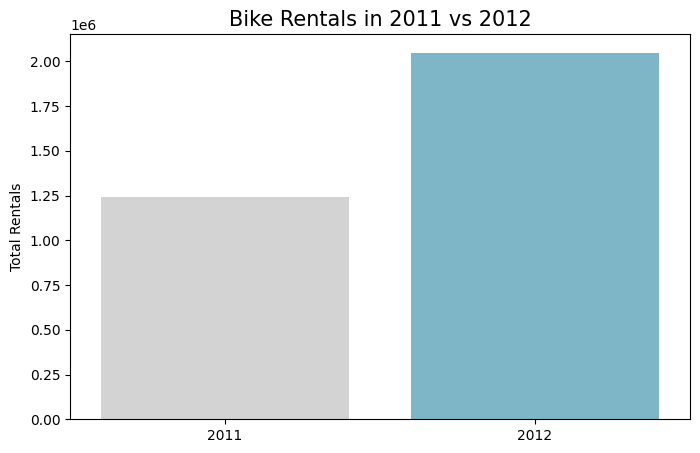

In [151]:
# Membuat diagram batang untuk membandingkan tingkat penyewaan di tahun 2011 dan 2012
byyear_df = bicycle_df.groupby(by=["yr_by_day"], as_index=False).cnt_by_day.sum()
plt.figure(figsize=(8, 5))
colors = ["#D3D3D3", "#72BCD4"]
sns.barplot(
    x="yr_by_day",
    y="cnt_by_day",
    data=byyear_df,
    palette=colors,
    errorbar=None
    )
plt.title("Bike Rentals in 2011 vs 2012", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("Total Rentals")
plt.xticks(ticks=range(0, 2), labels=[
    "2011", "2012"
])
plt.show()

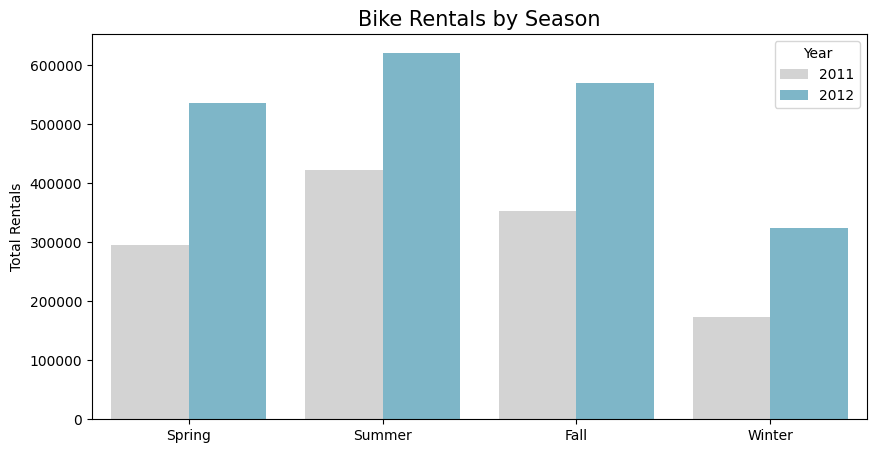

In [152]:
# Membuat diagram batang untuk membandingkan musim dimana sepeda paling banyak disewa dari tahun 2011 hingga 2012
byseason_df = bicycle_df.groupby(by=["season_by_hour", "yr_by_hour"], as_index=False).cnt_by_hour.sum()
plt.figure(figsize=(10, 5))
colors = ["#D3D3D3", "#72BCD4"]
sns.barplot(data=byseason_df,
             x="season_by_hour",
             y="cnt_by_hour",
             palette=colors,
             errorbar=None,
             hue="yr_by_hour"
             )

plt.title("Bike Rentals by Season", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("Total Rentals")
plt.xticks(ticks=range(0, 4), labels=[
    "Spring", "Summer", "Fall", "Winter"
])
plt.legend(title="Year", labels=["2011", "2012"])
plt.show()


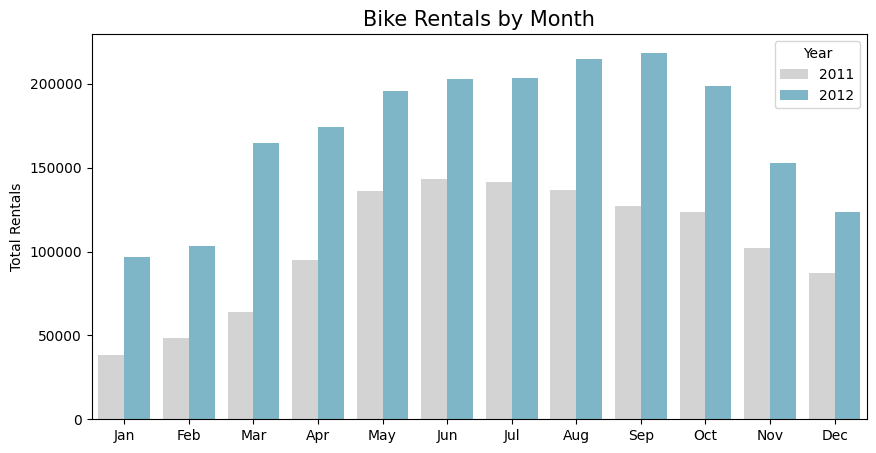

In [153]:
# Membuat diagram garis untuk membandingkan bulan dimana sepeda paling banyak disewa dari tahun 2011 hingga 2012
bymonth_df = bicycle_df.groupby(by=["mnth_by_hour", "yr_by_hour"], as_index=False).cnt_by_hour.sum()
plt.figure(figsize=(10, 5))
sns.barplot(data=bymonth_df,
             x="mnth_by_hour",
             y="cnt_by_hour",
             palette=colors,
             errorbar=None,
             hue="yr_by_hour",
             )

plt.title("Bike Rentals by Month",loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("Total Rentals")
plt.xticks(ticks=range(0, 12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.legend(title="Year", labels=["2011", "2012"])
plt.show()


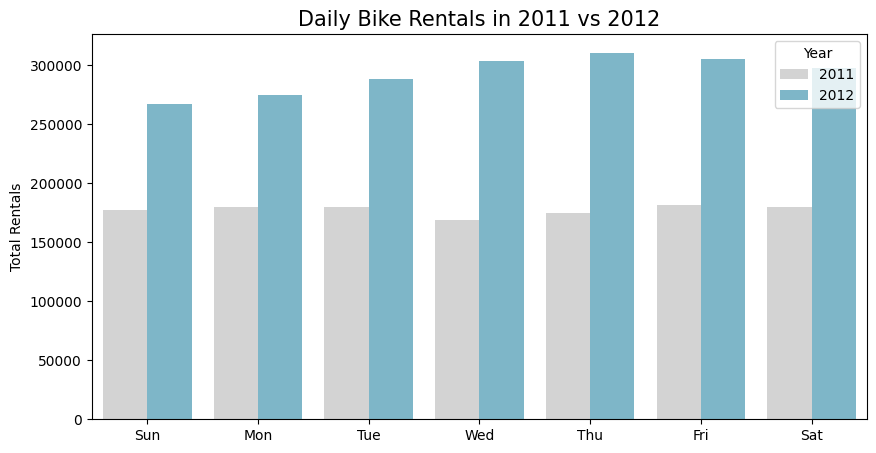

In [154]:
# Membuat diagram garis untuk melihat hari apa sepeda paling banyak disewa
byday_df = bicycle_df.groupby(by=["weekday_by_hour", "yr_by_hour"], as_index=False).cnt_by_hour.sum()
plt.figure(figsize=(10, 5))
sns.barplot(data=byday_df,
             x="weekday_by_hour",
             y="cnt_by_hour",
             hue="yr_by_hour",
             palette=colors,
             errorbar=None,
             )

plt.title("Daily Bike Rentals in 2011 vs 2012",
loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("Total Rentals")
plt.xticks(ticks=range(0, 7), labels=[
    "Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat",
])
plt.legend(title="Year", labels=["2011", "2012"])
plt.show()


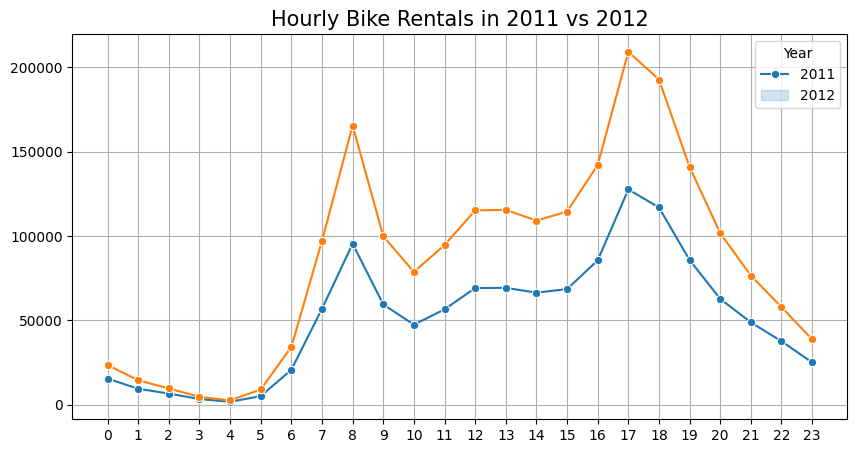

In [155]:
# Membuat diagram garis untuk melihat jam berapa sepeda paling banyak disewa
byhour_df = bicycle_df.groupby(by=["hr", "yr_by_hour"], as_index=False).cnt_by_hour.sum()
plt.figure(figsize=(10, 5))
sns.lineplot(
    x="hr",
    y="cnt_by_hour",
    data=byhour_df,
    marker="o",
    hue="yr_by_hour"
)
plt.title("Hourly Bike Rentals in 2011 vs 2012", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(range(0, 24))
plt.legend(title="Year", labels=["2011", "2012"])
plt.grid(True)


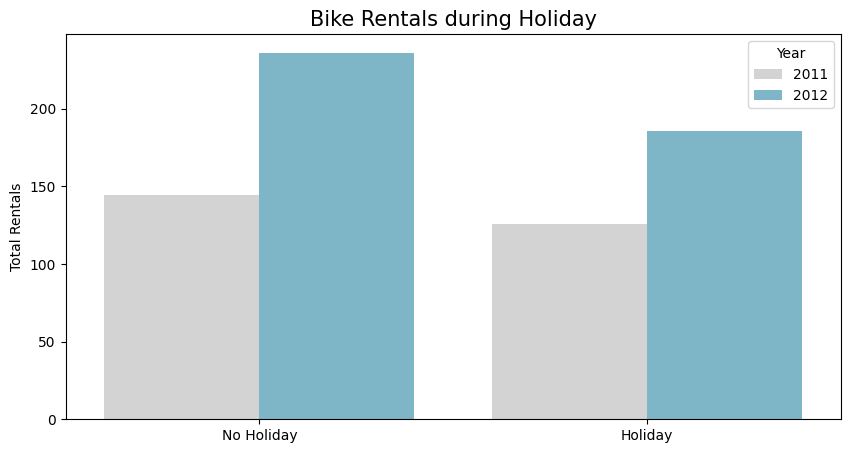

In [156]:
# Membuat diagram batang untuk melihat pengaruh hari libur terhadap jumlah penyewa sepeda
byholiday_df = bicycle_df.groupby(by=["holiday_by_hour", "yr_by_hour"], as_index=False).cnt_by_hour.mean()
plt.figure(figsize=(10, 5))
colors_1 = ["#D3D3D3", "#72BCD4"]
sns.barplot(data=byholiday_df,
             x="holiday_by_hour",
             y="cnt_by_hour",
             errorbar=None,
             hue="yr_by_hour",
             palette=colors_1
             )

plt.title("Bike Rentals during Holiday", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("Total Rentals")
plt.xticks(ticks=range(0, 2), labels=["No Holiday", "Holiday"])
plt.legend(title="Year", labels=["2011", "2012"])
plt.show()


### Pertanyaan 2:

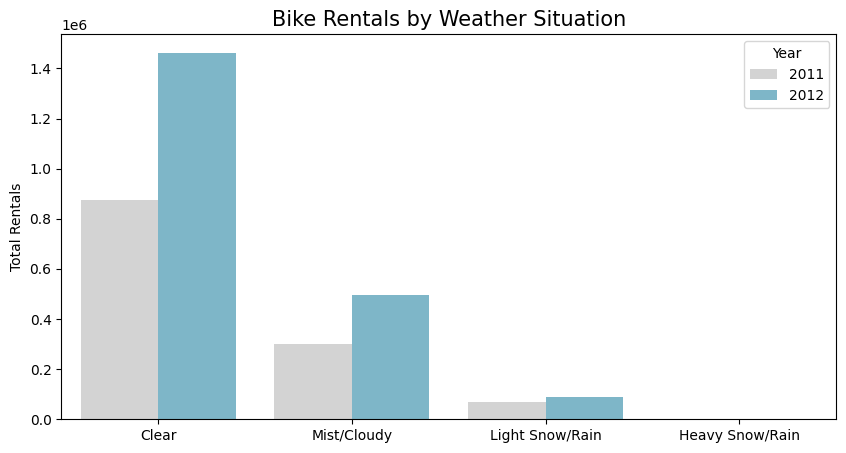

In [157]:
# Membuat diagram batang untuk melihat pengaruh cuaca terhadap jumlah penyewa sepeda
byweather_df = bicycle_df.groupby(by=["weathersit_by_hour", "yr_by_hour"], as_index=False).cnt_by_hour.sum()
plt.figure(figsize=(10, 5))
sns.barplot(data=byweather_df,
             x="weathersit_by_hour",
             y="cnt_by_hour",
             palette=colors_1,
             errorbar=None,
             hue="yr_by_hour"
             )

plt.title("Bike Rentals by Weather Situation", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("Total Rentals")
plt.xticks(ticks=range(0, 4), labels=["Clear", "Mist/Cloudy", "Light Snow/Rain", "Heavy Snow/Rain"])
plt.legend(title="Year", labels=["2011", "2012"])
plt.show()


**Insight:**
- Dibuat tiga buah grafik batang dan dua buah grafik garis untuk menjawab pertanyaan tentang kapan sepeda paling banyak disewa
- DIbuat satu buah grafik batang untuk menjelaskan pengaruh cuaca terhadap jumlah penyewa sepeda

## Analisis Lanjutan (Opsional)

In [158]:
# Membuat fungsi manual grouping untuk mengelompokkan waktu penyewaan sepeda
def category(hour):
    if 6 <= hour < 11:
        return "Morning"
    elif 11 <= hour < 15:
        return "Afternoon"
    elif 15 <= hour < 18:
        return "Evening"
    else:
        return "Night"

In [159]:
# Mencetak kategori untuk masing-masing waktu
bicycle_df["time_category"] = bicycle_df["hr"].apply(category)
bicycle_df[["hr", "time_category"]].head()

,hr,time_category
0,0,Night
1,1,Night
2,2,Night
3,3,Night
4,4,Night


In [160]:
# Menyelidiki kategori waktu apakah yang memiliki penyewa speda terbanyak
bicycle_df.groupby(by="time_category").cnt_by_hour.sum().sort_values(ascending=False)

,cnt_by_hour
time_category,
Night,1092618
Morning,755999
Evening,747757
Afternoon,696305


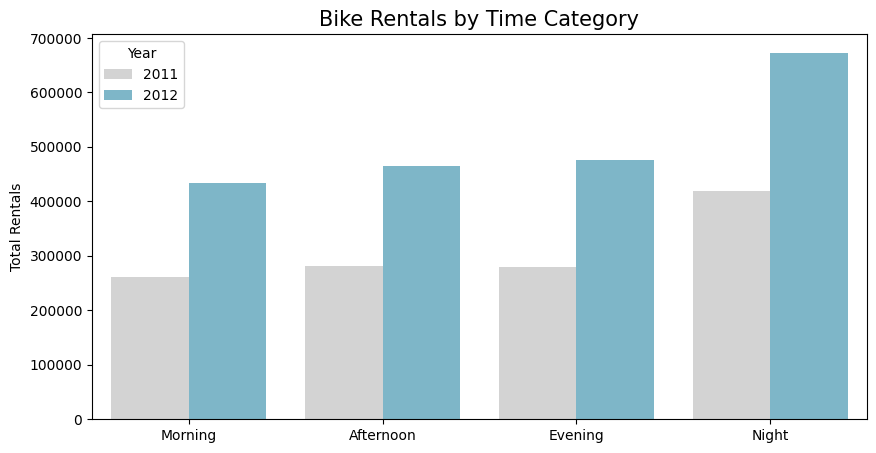

In [161]:
# Membuat diagram batang untuk melihat pada kategori waktu apa sepeda paling banyak disewa
bytimecat_df = bicycle_df.groupby(by=["time_category", "yr_by_hour"], as_index=False).cnt_by_hour.sum()
plt.figure(figsize=(10, 5))
sns.barplot(data=bytimecat_df,
             x="time_category",
             y="cnt_by_hour",
             palette=colors_1,
             errorbar=None,
             hue="yr_by_hour"
             )

plt.title("Bike Rentals by Time Category", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("Total Rentals")
plt.xticks(ticks=range(0, 4), labels=["Morning", "Afternoon", "Evening", "Night"])
plt.legend(title="Year", labels=["2011", "2012"])
plt.show()


In [162]:
# Membuat fungsi manual grouping untuk mengelompokkan tingkat penyewaan sepeda berdasarkan kategori suhu
def category_1(temperature):
  if temperature <= 10:
    return "cold"
  elif 10 < temperature <= 20:
    return "Cool"
  elif 20 < temperature <= 30:
    return "Warm"
  else:
    return "Hot"

In [163]:
# Mencetak kategori untuk masing-masing suhu
bicycle_df["temp_category"] = bicycle_df["temp_by_hour"].apply(category_1)
bicycle_df[["temp_by_hour", "temp_category"]].head()

,temp_by_hour,temp_category
0,9.84,cold
1,9.02,cold
2,9.02,cold
3,9.84,cold
4,9.84,cold


In [164]:
# Menyelidiki pada kategori suhu manakah yang memiliki penyewa sepeda terbanyak
bicycle_df.groupby(by="temp_category").cnt_by_hour.sum().sort_values(ascending=False)

,cnt_by_hour
temp_category,
Warm,1546819
Cool,910555
Hot,694404
cold,140901


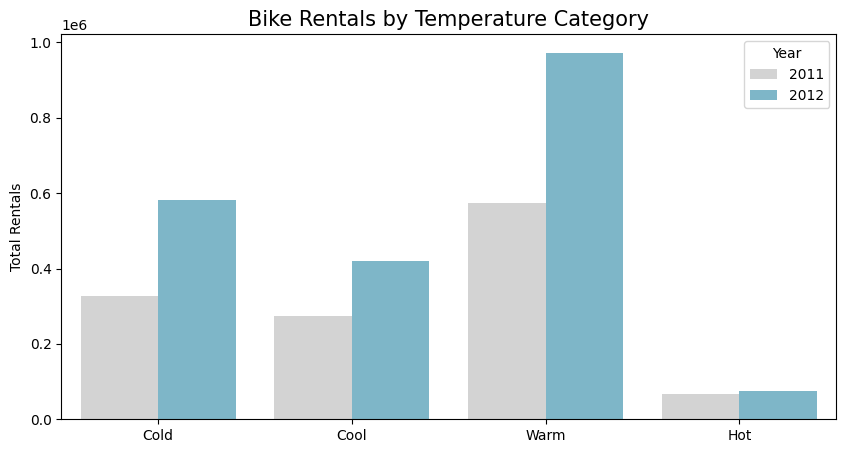

In [165]:
# Membuat diagram batang untuk melihat pada kategori suhu apa sepeda paling banyak disewa
bytempcat_df = bicycle_df.groupby(by=["temp_category", "yr_by_hour"], as_index=False).cnt_by_hour.sum()
plt.figure(figsize=(10, 5))
sns.barplot(data=bytempcat_df,
             x="temp_category",
             y="cnt_by_hour",
             palette=colors_1,
             errorbar=None,
             hue="yr_by_hour"
             )

plt.title("Bike Rentals by Temperature Category", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("Total Rentals")
plt.xticks(ticks=range(0, 4), labels=["Cold", "Cool", "Warm", "Hot"])
plt.legend(title="Year", labels=["2011", "2012"])
plt.show()


## Conclusion

- Jumlah penyewa sepeda pada tahun 2012 mengalami peningkatan dibandingkan dengan tahun 2011. Berdasarkan grafik yang telah dibuat, penyewaan sepeda tertinggi terjadi pada musim panas, sedangkan yang terendah terjadi pada musim dingin. Pada tahun 2012, bulan September dan hari Kamis mencatatkan tingkat penyewaan tertinggi. Selain itu, selama dua tahun berturut-turut, tingkat penyewaan sepeda paling tinggi terjadi pada pukul 08.00 dan 17.00. Menariknya, jumlah penyewa justru berkurang pada hari libur, yang mengindikasikan bahwa mayoritas penyewa adalah pekerja. Dengan demikian, dapat disimpulkan bahwa sepeda paling banyak disewa pada pukul 08.00 dan 17.00 selama musim panas.
- Cuaca mempengaruhi tingkat penyewaan sepeda, dimana tingkat penyewaan sepeda paling tinggi pada saat cuaca cerah dan paling rendah pada saat cuaca sedang hujan deras atau turun salju lebat.
- Selanjutnya, pada analisis lanjutan didapati bahwa sepeda paling banyak disewa pada malam hari dengan rentang dari pukul 18.00 - 05.59 dan menurut kategori suhu, pada saat suhu sedang hangat yaitu di rentang interval 20 sampai 30 derajat Celcius